In [32]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

## Load Datasets

In [23]:
data_without_outliers = pd.read_csv(
    "data/model_training_files/imputed_without_outliers.csv"
)
data_without_outliers.columns

Index(['Unnamed: 0', 'Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity',
       'Total CO2 Equivalent Emissions To Revenues USD in million',
       'Company Market Capitalization',
       'Property Plant And Equipment, Total - Gross',
       'P/E (Daily Time Series Ratio)', 'returns_yearly', 'Current Ratio',
       'Debt-to-Equity Ratio', 'Return on Assets', 'Revenue Per Employee',
       'Return on Equity', 'Asset Turnover Ratio', 'Net Income Margin', 'RIC',
       'Year', 'ESG Score'],
      dtype='object')

In [ ]:
data_without_outliers.shape

In [24]:
data_with_outliers = pd.read_csv(
    "data/model_training_files/imputed_with_outliers.csv"
)
data_with_outliers.columns

Index(['Unnamed: 0', 'Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity',
       'Total CO2 Equivalent Emissions To Revenues USD in million',
       'Company Market Capitalization',
       'Property Plant And Equipment, Total - Gross',
       'P/E (Daily Time Series Ratio)', 'returns_yearly', 'Current Ratio',
       'Debt-to-Equity Ratio', 'Return on Assets', 'Revenue Per Employee',
       'Return on Equity', 'Asset Turnover Ratio', 'Net Income Margin', 'RIC',
       'Year', 'ESG Score'],
      dtype='object')

In [ ]:
data_with_outliers.shape

## Without Outliers

### 1. With Absolute Ratios

In [ ]:
X = data_without_outliers.drop(
    columns=["Unnamed: 0", "RIC", "Year", "ESG Score"]
)

In [ ]:
y = pd.Series(data_without_outliers["ESG Score"])

In [ ]:
X = X.drop(
    columns=[
        "Total Current Assets",
        "Total Current Liabilities",
        "Total Debt",
        "Total Assets, Reported",
        "Net Income - Actual",
        "Company Market Capitalization",
        "Total Revenue",
        "Total Equity",
    ]
)

In [ ]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
# initialize the ensemble regression models
rf = RandomForestRegressor(n_estimators=100, random_state=42)


# fit the models on the training data
rf.fit(X_train, y_train)


# make predictions on the testing data
rf_pred = rf.predict(X_test)


# calculate the root mean squared error of each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))


# calculate the root mean absolute error of each model
rf_rmae = mean_absolute_error(y_test, rf_pred)


# print the RMSE of each model
print("Random Forest RMSE:", rf_rmse)

# print the RMAE of each model
print("Random Forest RMAE:", rf_rmae)


# create a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)
# perform cross-validation and calculate the r2_score for each model
rf_scores = cross_val_score(rf, X, y, cv=folds, scoring="r2")


# print the r2_score of each model
print("Random Forest r2_score:", np.mean(rf_scores))

### 2. Without Absolute Ratios

In [ ]:
X = data_without_outliers.drop(
    columns=["Unnamed: 0", "RIC", "Year", "ESG Score"]
)

In [ ]:
y = pd.Series(data_without_outliers["ESG Score"])

In [ ]:
X = X.drop(
    columns=[
        "Current Ratio",
        "Debt-to-Equity Ratio",
        "Return on Assets",
        "Revenue Per Employee",
        "Return on Equity",
        "Asset Turnover Ratio",
        "Net Income Margin",
    ]
)

In [ ]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
# initialize the ensemble regression models
rf = RandomForestRegressor(n_estimators=100, random_state=42)


# fit the models on the training data
rf.fit(X_train, y_train)


# make predictions on the testing data
rf_pred = rf.predict(X_test)


# calculate the root mean squared error of each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))


# calculate the root mean absolute error of each model
rf_rmae = mean_absolute_error(y_test, rf_pred)


# print the RMSE of each model
print("Random Forest RMSE:", rf_rmse)

# print the RMAE of each model
print("Random Forest RMAE:", rf_rmae)


# create a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)
# perform cross-validation and calculate the r2_score for each model
rf_scores = cross_val_score(rf, X, y, cv=folds, scoring="r2")


# print the r2_score of each model
print("Random Forest r2_score:", np.mean(rf_scores))

In [ ]:
# print the r2_score of each model
print("Random Forest r2_score:", np.mean(rf_scores))

### 3. All features

In [ ]:
X = data_without_outliers.drop(
    columns=["Unnamed: 0", "RIC", "Year", "ESG Score"]
)

In [ ]:
y = pd.Series(data_without_outliers["ESG Score"])

In [ ]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
# initialize the ensemble regression models
rf = RandomForestRegressor(n_estimators=100, random_state=42)


# fit the models on the training data
rf.fit(X_train, y_train)


# make predictions on the testing data
rf_pred = rf.predict(X_test)


# calculate the root mean squared error of each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))


# calculate the root mean absolute error of each model
rf_rmae = mean_absolute_error(y_test, rf_pred)


# print the RMSE of each model
print("Random Forest RMSE:", rf_rmse)

# print the RMAE of each model
print("Random Forest RMAE:", rf_rmae)


# create a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)
# perform cross-validation and calculate the r2_score for each model
rf_scores = cross_val_score(rf, X, y, cv=folds, scoring="r2")


# print the r2_score of each model
print("Random Forest r2_score:", np.mean(rf_scores))

## With Outliers

### 1. With Absolute Ratios

In [ ]:
X = data_with_outliers.drop(columns=["Unnamed: 0", "RIC", "Year", "ESG Score"])

In [ ]:
y = pd.Series(data_with_outliers["ESG Score"])

In [ ]:
X = X.drop(
    columns=[
        "Total Current Assets",
        "Total Current Liabilities",
        "Total Debt",
        "Total Assets, Reported",
        "Net Income - Actual",
        "Company Market Capitalization",
        "Total Revenue",
        "Total Equity",
    ]
)

In [ ]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
# initialize the ensemble regression models
rf = RandomForestRegressor(n_estimators=100, random_state=42)


# fit the models on the training data
rf.fit(X_train, y_train)


# make predictions on the testing data
rf_pred = rf.predict(X_test)


# calculate the root mean squared error of each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))


# calculate the root mean absolute error of each model
rf_rmae = mean_absolute_error(y_test, rf_pred)


# print the RMSE of each model
print("Random Forest RMSE:", rf_rmse)

# print the RMAE of each model
print("Random Forest RMAE:", rf_rmae)


# create a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)
# perform cross-validation and calculate the r2_score for each model
rf_scores = cross_val_score(rf, X, y, cv=folds, scoring="r2")


# print the r2_score of each model
print("Random Forest r2_score:", np.mean(rf_scores))

### 2. Without Absolute Ratios

In [25]:
X = data_with_outliers.drop(columns=["Unnamed: 0", "RIC", "Year", "ESG Score"])

In [26]:
y = pd.Series(data_with_outliers["ESG Score"])

In [ ]:
X = X.drop(
    columns=[
        "Current Ratio",
        "Debt-to-Equity Ratio",
        "Return on Assets",
        "Revenue Per Employee",
        "Return on Equity",
        "Asset Turnover Ratio",
        "Net Income Margin",
    ]
)

In [ ]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
# initialize the ensemble regression models
rf = RandomForestRegressor(n_estimators=100, random_state=42)


# fit the models on the training data
rf.fit(X_train, y_train)


# make predictions on the testing data
rf_pred = rf.predict(X_test)


# calculate the root mean squared error of each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))


# calculate the root mean absolute error of each model
rf_rmae = mean_absolute_error(y_test, rf_pred)


# print the RMSE of each model
print("Random Forest RMSE:", rf_rmse)

# print the RMAE of each model
print("Random Forest RMAE:", rf_rmae)


# create a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)
# perform cross-validation and calculate the r2_score for each model
rf_scores = cross_val_score(rf, X, y, cv=folds, scoring="r2")


# print the r2_score of each model
print("Random Forest r2_score:", np.mean(rf_scores))

### 3. All Features

In [27]:
X = data_with_outliers.drop(columns=["Unnamed: 0", "RIC", "Year", "ESG Score"])

In [28]:
y = pd.Series(data_with_outliers["ESG Score"])

In [29]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [30]:
# initialize the ensemble regression models
rf = RandomForestRegressor(n_estimators=100, random_state=42)


# fit the models on the training data
rf.fit(X_train, y_train)


# make predictions on the testing data
rf_pred = rf.predict(X_test)


# calculate the root mean squared error of each model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))


# calculate the root mean absolute error of each model
rf_rmae = mean_absolute_error(y_test, rf_pred)


# print the RMSE of each model
print("Random Forest RMSE:", rf_rmse)

# print the RMAE of each model
print("Random Forest RMAE:", rf_rmae)


# create a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=100)
# perform cross-validation and calculate the r2_score for each model
rf_scores = cross_val_score(rf, X, y, cv=folds, scoring="r2")


# print the r2_score of each model
print("Random Forest r2_score:", np.mean(rf_scores))

Random Forest RMSE: 13.220924885136958
Random Forest RMAE: 10.379928844761869
Random Forest r2_score: 0.525985877764467


In [66]:
columns = [
    "Total Current Assets",
    "Total Current Liabilities",
    "Total Debt",
    "Total Assets, Reported",
    "Net Income - Actual",
    "Revenue Per Share",
    "Total Revenue",
    "Total Equity",
    "Total CO2 Emissions To Revenues",
    "Company Market Capitalization",
    "Property Plant And Equipment",
    "P/E (Daily Time Series Ratio)",
    "returns_yearly",
    "Current Ratio",
    "Debt-to-Equity Ratio",
    "Return on Assets",
    "Revenue Per Employee",
    "Return on Equity",
    "Asset Turnover Ratio",
    "Net Income Margin",
]

In [67]:
feature_importance_score = pd.DataFrame(
    data={
        "feature": columns,
        "scores": list(rf.feature_importances_),
    }
)
df_scores = feature_importance_score.sort_values(by="scores", ascending=False)

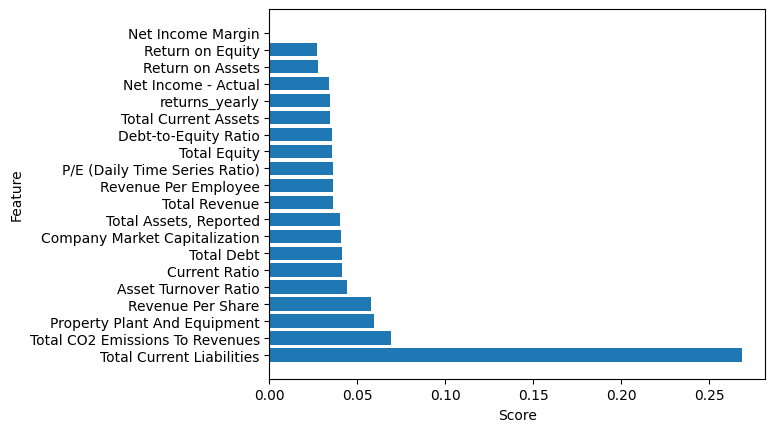

In [68]:
# Create a horizontal bar plot
fig, ax = plt.subplots()
ax.barh(df_scores["feature"], df_scores["scores"])

# Set the title and labels
# ax.set_title('Feature Importance from Random Forest Regressor')
ax.set_xlabel("Score")
ax.set_ylabel("Feature")

plt.show()